# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore")

# Import dataset

In [4]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

In [6]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Exploratory Data Analysis

In [8]:
#check for columns
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [10]:
#check summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [12]:
#check shape of dataframe
df.shape

(100000, 9)

In [14]:
#check for nulls
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [16]:
#check for duplicates
df.duplicated().sum()

3854

In [18]:
#drop duplicates
df=df.drop_duplicates()

In [20]:
#check statistical summary of data
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [22]:
#check to see if duplicates has been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


###checking unique values for some features

In [24]:
df['hypertension'].unique()

array([0, 1], dtype=int64)

In [26]:
df['heart_disease'].unique()

array([1, 0], dtype=int64)

In [28]:
df['diabetes'].unique()

array([0, 1], dtype=int64)

In [30]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [32]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [34]:
df['age']=df['age'].astype('int')

In [36]:
df['hypertension']=df['hypertension'].astype('int')

In [38]:
df['heart_disease']=df['heart_disease'].astype('int')

In [40]:
df['diabetes']=df['diabetes'].astype('int')

In [42]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  int32  
 2   hypertension         96146 non-null  int32  
 3   heart_disease        96146 non-null  int32  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int32  
dtypes: float64(2), int32(4), int64(1), object(2)
memory usage: 5.9+ MB


In [46]:
df['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

In [48]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [50]:
df['hypertension'].value_counts()

hypertension
0    88685
1     7461
Name: count, dtype: int64

In [52]:
df['heart_disease'].value_counts()

heart_disease
0    92223
1     3923
Name: count, dtype: int64

In [54]:
df['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

# Correlation

In [56]:
#check correlation

df.corr(numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.257221,0.238344,0.345145,0.106691,0.114273,0.264846
hypertension,0.257221,1.000000,0.119982,0.148111,0.081441,0.084834,0.195710
heart_disease,0.238344,0.119982,1.000000,0.061376,0.068140,0.070832,0.170711
bmi,0.345145,0.148111,0.061376,1.000000,0.084423,0.092543,0.214932
HbA1c_level,0.106691,0.081441,0.068140,0.084423,1.000000,0.171615,0.406408
blood_glucose_level,0.114273,0.084834,0.070832,0.092543,0.171615,1.000000,0.424336
diabetes,0.264846,0.195710,0.170711,0.214932,0.406408,0.424336,1.000000


<Axes: >

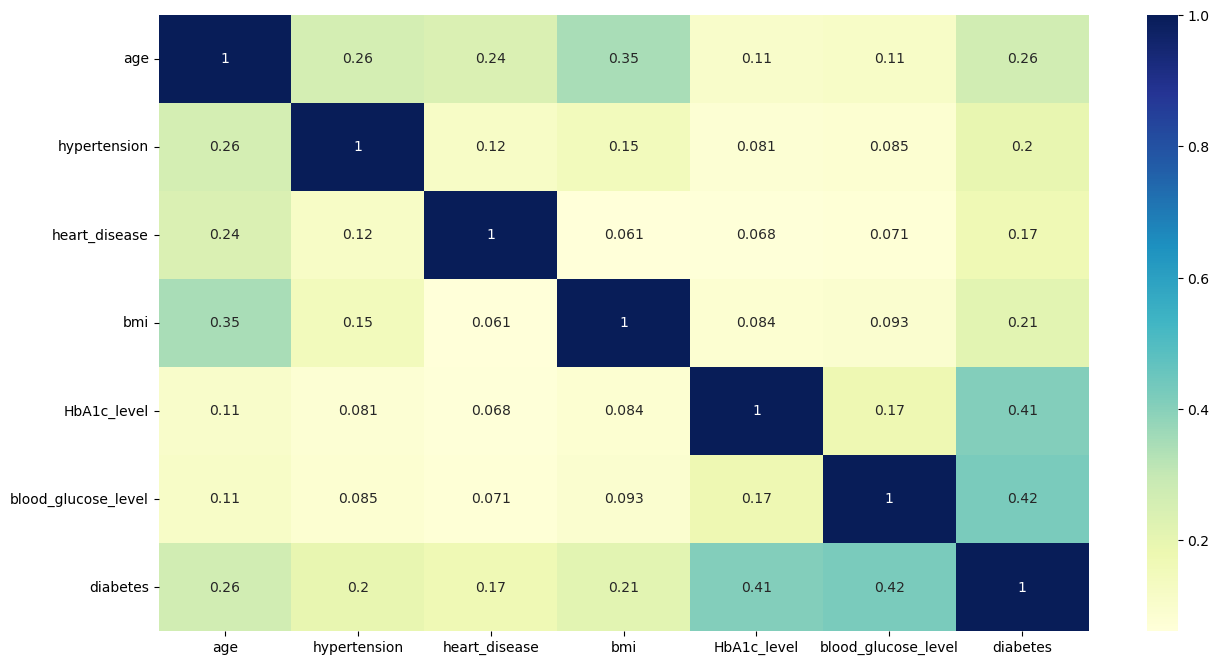

In [58]:
#plot correlation

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="YlGnBu")

#The strongly correlated features with diabetes are Blood glucose level, HbA1c Level while BMI, Hypertension and Age shows a moderate correlation with diabetes and heart disease showing the weakest correlation.

## Quantitative Distribution of the Target Variable

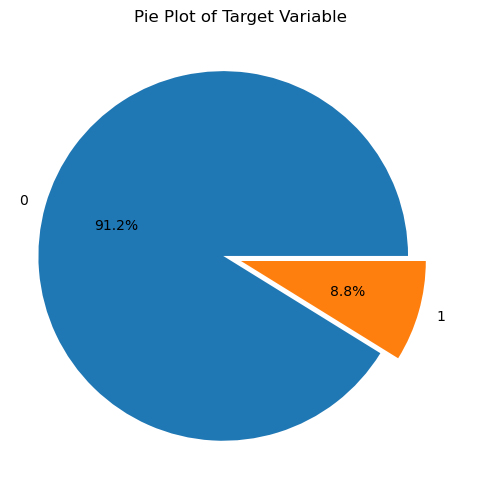

In [60]:
#pie plot of target variable

explode_values = (0.1,0)
#autopct = lambda pct: "{:.0f}%".format(pct) if pct > 10 else ""
plt.figure(figsize=(6,6))
plt.pie(
    df["diabetes"].value_counts(),
    labels=df["diabetes"].unique(),
    explode=explode_values,
    autopct='%1.1f%%',
)
plt.title("Pie Plot of Target Variable")
plt.show()

Text(0.5, 1.0, 'Countplot of Target Variable')

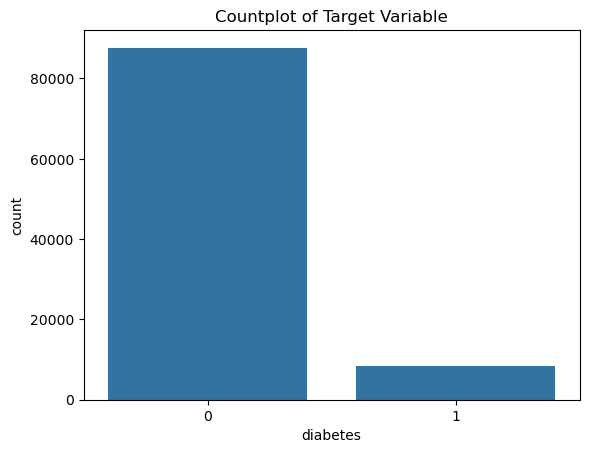

In [62]:
#countplot of target variable

sns.countplot(x=df["diabetes"]).set_title("Countplot of Target Variable")

In [64]:
#percentage split of target variable

diabetes_val = pd.DataFrame(df["diabetes"].value_counts())
diabetes_val["%"] = diabetes_val["count"] / df.shape[0]
diabetes_val

,count,%
diabetes,,
0,87664,0.91178
1,8482,0.08822



Number of unique categories is 2. This shows that 1 which stands for diabetes has less than 10% of dataset. Most of the data samples have 0,which stands for non-diabetic (over 90% of all records) indicating an imbalanced dataset.

# Features vs Target

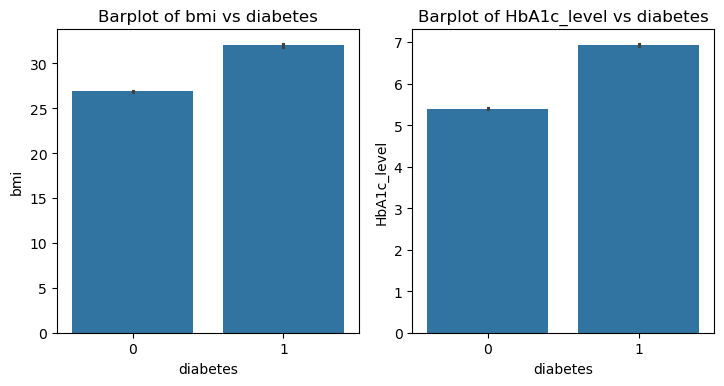

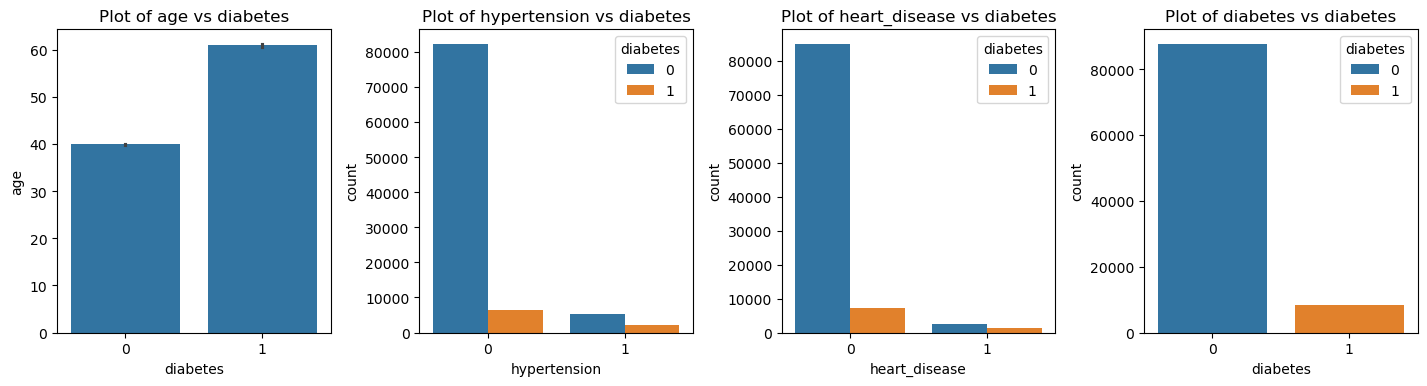

In [68]:
# ---- PLOT FLOAT COLUMNS ----
plt.figure(figsize=(18, 18))
float_columns = df.select_dtypes(include=["float64"]).columns

for i, col in enumerate(float_columns):
    ax = plt.subplot(5, 5, i + 1)
    sns.barplot(data=df, x='diabetes', y=col, ax=ax)
    ax.set_title(f'Barplot of {col} vs diabetes')

plt.tight_layout()
plt.show()


# ---- PLOT INTEGER COLUMNS ----
plt.figure(figsize=(18, 18))
int_columns = df.select_dtypes(include=["int32"]).columns

for i, col in enumerate(int_columns):
    ax = plt.subplot(5, 5, i + 1)
    
    # Check if column is categorical (e.g., encoded labels)
    if df[col].nunique() < 10:  # Arbitrary threshold for categorical vs numeric
        sns.countplot(data=df, x=col, hue="diabetes", ax=ax)  # Use countplot for categorical
    else:
        sns.barplot(data=df, x='diabetes', y=col, ax=ax)  # Use barplot for numeric
    
    ax.set_title(f'Plot of {col} vs diabetes')

plt.tight_layout()
plt.show()


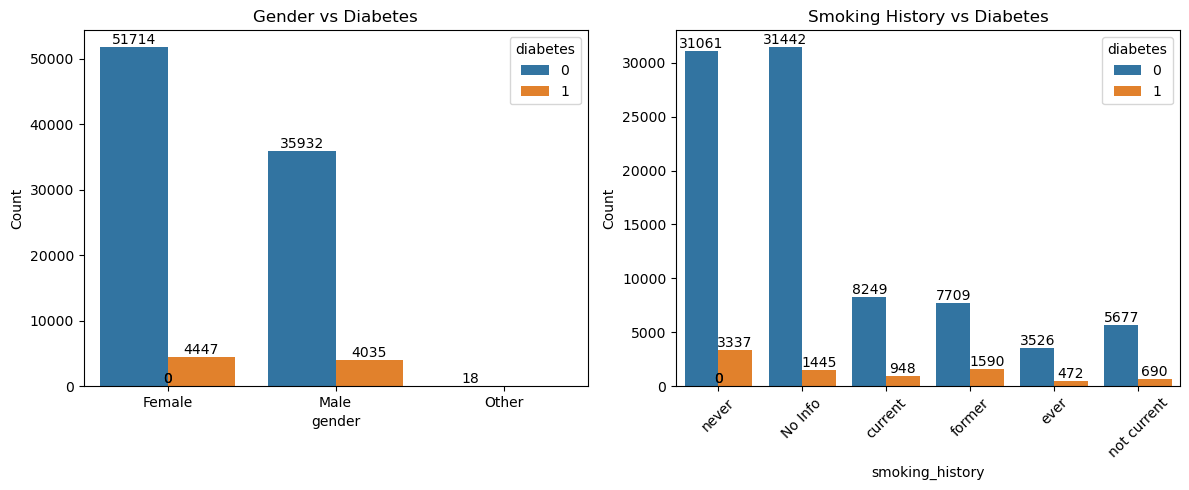

In [70]:

# Set figure size
plt.figure(figsize=(12, 5))

# ---- GENDER vs DIABETES ----
ax1 = plt.subplot(1, 2, 1)  # First subplot
sns.countplot(data=df, x="gender", hue="diabetes", ax=ax1)
ax1.set_title("Gender vs Diabetes")
ax1.set_ylabel("Count")

# Add count labels on bars
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),  
                 ha='center', va='bottom', fontsize=10, color='black')

# ---- SMOKING HISTORY vs DIABETES ----
ax2 = plt.subplot(1, 2, 2)  # Second subplot
sns.countplot(data=df, x="smoking_history", hue="diabetes", ax=ax2)
ax2.set_title("Smoking History vs Diabetes")
ax2.set_ylabel("Count")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)  # Rotate labels if long

# Add count labels on bars
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),  
                 ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()  # Adjust layout for clarity
plt.show()

From the bar plot above;

Diabetic patients are high in blood_glucose_level, bmi, HbA1c_level, Age and in smoking history(former & never )and low in hypertension and heart disease

Non-Diabetic patients are high in heart disease, hypertension and in smoking history(No info & never )and low in bmi, HbA1c_level, Age


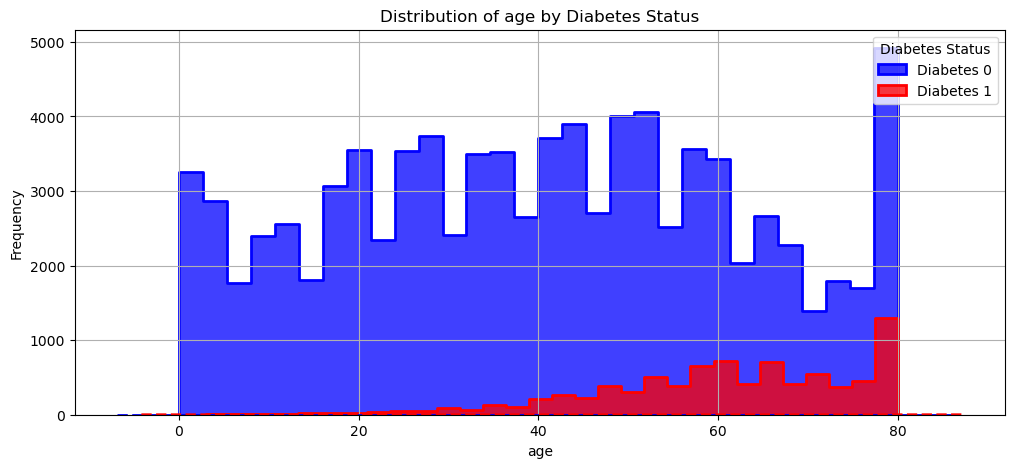

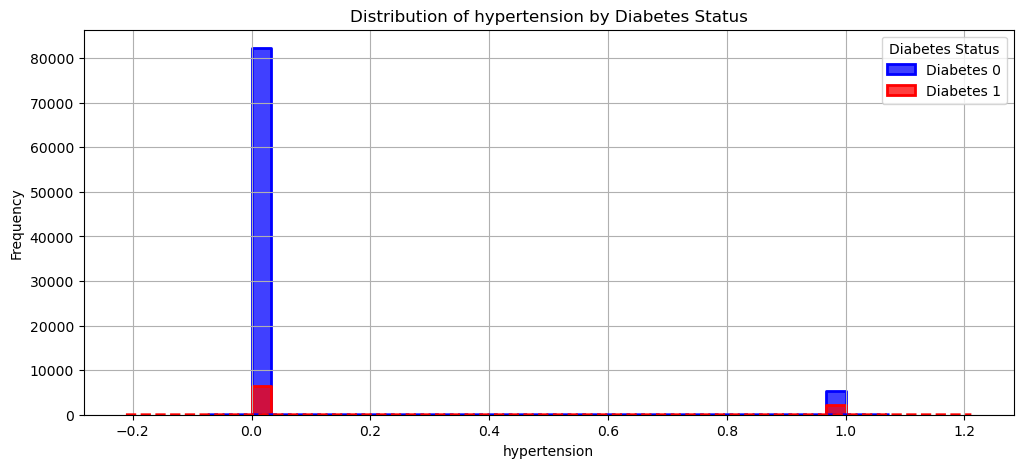

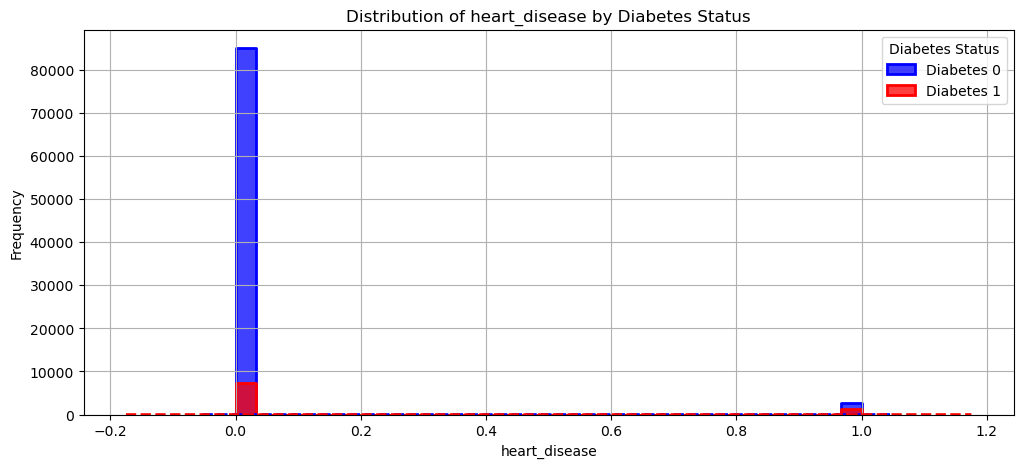

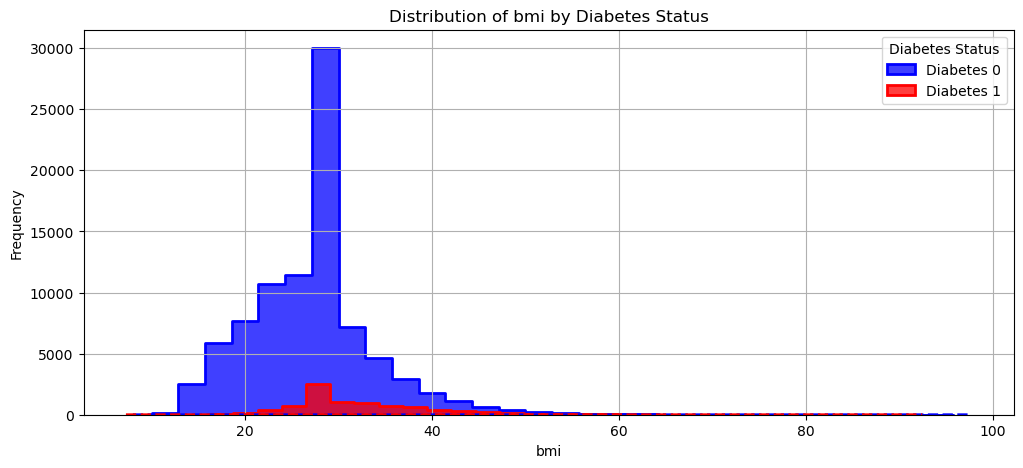

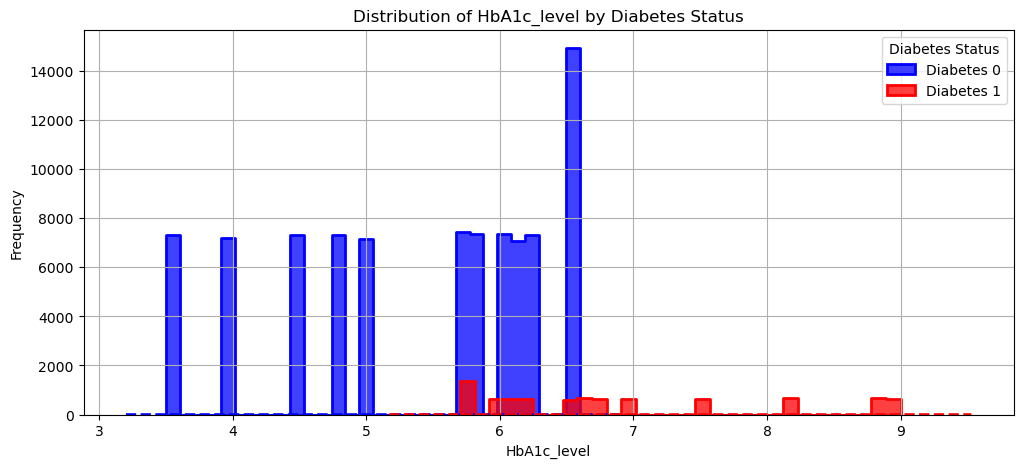

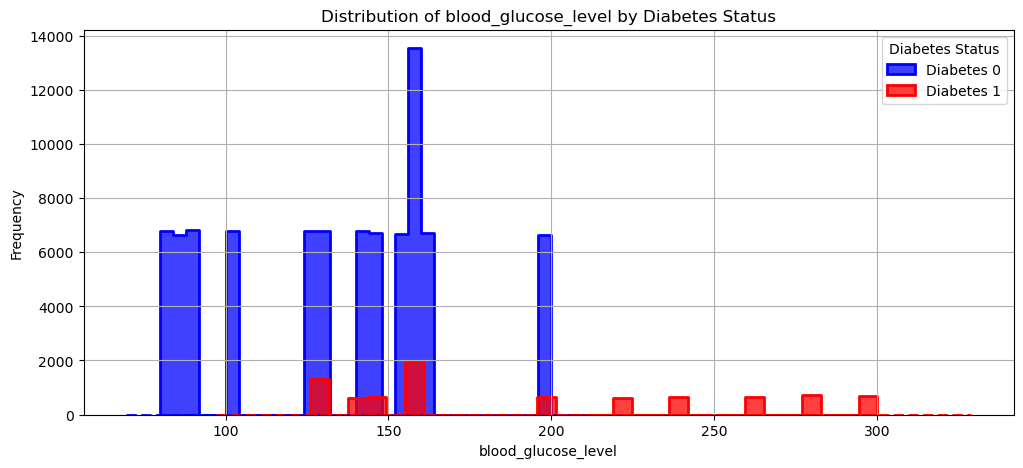

In [76]:
df['diabetes'] = df['diabetes'].astype(str)  # Convert to string for proper grouping

# Select only numerical columns
numerical_features = df.select_dtypes(include=[np.number]).columns
#Definimg contrasting colors
colors={"0":"blue","1" :"red"}

# Plot histograms for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(12, 5))
    # Plot line-style histogram for each diabetes group

    for diabetes_status in df['diabetes'].unique():
        subset = df[df['diabetes'] == diabetes_status]
        #histogram step-style
        sns.histplot(subset[feature], bins=30, element="step", color=colors[diabetes_status], label=f"Diabetes {diabetes_status}", linewidth=2)
        #KDE curve
        sns.kdeplot(subset[feature], color=colors[diabetes_status], linewidth=2,linestyle="dashed")
   # Formatting
    plt.title(f"Distribution of {feature} by Diabetes Status")
    plt.xlabel(feature)
    plt.ylabel("Frequency")  # Changed from density to frequency
    plt.legend(title="Diabetes Status")
    plt.grid(True)

    plt.show()

    

In [78]:
df['age_group']=0

In [80]:
age_group=[]
for i in df["age"]:
    if i >=60:
       age_group.append("old ")
    elif (i>=35) and (i<60):
        age_group.append("old adult")
    elif (i>=20) and (i<34):
       age_group.append("young adult")
    elif (i>=13) and (i<19):
        age_group.append("teenager")
    else:
        age_group.append("children")


In [82]:
df['age_group']=age_group

In [84]:
df = df.drop(columns=['hypertension','heart_disease','age'])

In [86]:
df.to_csv('diabetes_prediction_dataset_updated.csv',index=False)

In [88]:
df

,gender,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,Female,never,25.19,6.6,140,0,old
1,Female,No Info,27.32,6.6,80,0,old adult
2,Male,never,27.32,5.7,158,0,young adult
3,Female,current,23.45,5.0,155,0,old adult
4,Male,current,20.14,4.8,155,0,old
...,...,...,...,...,...,...,...
99994,Female,No Info,24.60,4.8,145,0,old adult
99996,Female,No Info,17.37,6.5,100,0,children
99997,Male,former,27.83,5.7,155,0,old
99998,Female,never,35.42,4.0,100,0,young adult


In [90]:
data=df.copy()

In [92]:
data

,gender,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,Female,never,25.19,6.6,140,0,old
1,Female,No Info,27.32,6.6,80,0,old adult
2,Male,never,27.32,5.7,158,0,young adult
3,Female,current,23.45,5.0,155,0,old adult
4,Male,current,20.14,4.8,155,0,old
...,...,...,...,...,...,...,...
99994,Female,No Info,24.60,4.8,145,0,old adult
99996,Female,No Info,17.37,6.5,100,0,children
99997,Male,former,27.83,5.7,155,0,old
99998,Female,never,35.42,4.0,100,0,young adult


In [94]:
converter=LabelEncoder()

In [96]:
data['gender']=converter.fit_transform(data['gender'])

In [98]:
data['smoking_history']=converter.fit_transform(data['smoking_history'])

In [100]:
data['age_group']=converter.fit_transform(data['age_group'])

In [102]:
data

,gender,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,0,4,25.19,6.6,140,0,1
1,0,0,27.32,6.6,80,0,2
2,1,4,27.32,5.7,158,0,4
3,0,1,23.45,5.0,155,0,2
4,1,1,20.14,4.8,155,0,1
...,...,...,...,...,...,...,...
99994,0,0,24.60,4.8,145,0,2
99996,0,0,17.37,6.5,100,0,0
99997,1,3,27.83,5.7,155,0,1
99998,0,4,35.42,4.0,100,0,4


In [104]:
result=data['diabetes']

In [106]:
result

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96146, dtype: object

In [108]:
data=data.drop(columns='diabetes')

In [110]:
data

,gender,smoking_history,bmi,HbA1c_level,blood_glucose_level,age_group
0,0,4,25.19,6.6,140,1
1,0,0,27.32,6.6,80,2
2,1,4,27.32,5.7,158,4
3,0,1,23.45,5.0,155,2
4,1,1,20.14,4.8,155,1
...,...,...,...,...,...,...
99994,0,0,24.60,4.8,145,2
99996,0,0,17.37,6.5,100,0
99997,1,3,27.83,5.7,155,1
99998,0,4,35.42,4.0,100,4


# Building model with unbanlanced data

In [97]:
#split data
training_data,test_data,training_result,test_result=train_test_split(data,result,test_size=0.3,random_state=41)

In [99]:
training_data

,gender,smoking_history,bmi,HbA1c_level,blood_glucose_level,age_group
36251,1,0,27.32,3.5,130,4
63264,1,4,26.48,4.5,90,4
46169,1,2,22.41,6.6,90,4
65904,1,4,33.45,3.5,90,2
81484,1,4,32.26,4.8,200,2
...,...,...,...,...,...,...
54724,0,4,25.68,6.1,126,1
89107,0,4,29.47,6.2,130,2
62960,0,0,19.98,5.8,126,4
931,0,3,22.46,4.8,90,1


In [97]:
test_data

,gender,smoking_history,bmi,HbA1c_level,blood_glucose_level,age_group
94329,0,5,22.82,4.5,140,4
99308,0,0,26.48,6.5,158,4
83737,0,5,43.42,6.1,126,2
85740,1,1,29.24,6.2,158,4
70380,1,0,22.19,8.8,155,1
...,...,...,...,...,...,...
23962,0,4,47.89,5.0,155,4
82525,0,4,25.31,6.1,158,2
53845,1,4,19.75,6.6,200,3
19609,1,2,27.32,6.5,200,2


In [101]:
training_result

36251    0
63264    0
46169    0
65904    0
81484    0
        ..
54724    0
89107    0
62960    0
931      0
35300    0
Name: diabetes, Length: 67302, dtype: int32

In [103]:
test_result

94329    0
99308    0
83737    0
85740    0
70380    1
        ..
23962    0
82525    0
53845    0
19609    0
25243    0
Name: diabetes, Length: 28844, dtype: int32

### Random forest Model

In [105]:
#random forest 

rf=RandomForestClassifier(random_state=42)
rf.fit(training_data,training_result)
y_pred=rf.predict(test_data)

print(accuracy_score(test_result,y_pred))
print(f1_score(test_result,y_pred,average='weighted'))
print(classification_report(test_result,y_pred))

0.9674455692691721
0.9656505049403628
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     26362
           1       0.90      0.70      0.79      2482

    accuracy                           0.97     28844
   macro avg       0.93      0.85      0.89     28844
weighted avg       0.97      0.97      0.97     28844



Using unbalanced data, the model is unable to classify the minority class. It is more biased towards 0(non-diabetic) which is the the most dominant. 

## SMOTE - Synthetic Minority Oversampling Technique

Since the data is imbalanced we would use SMOTE oversampling to balance the data before modelling

In [107]:
sm = SMOTE(random_state=42)
data, result = sm.fit_resample(data, result)

In [109]:
#balanced data

print("Original class distribution:")
print(result.value_counts())

Original class distribution:
diabetes
0    87664
1    87664
Name: count, dtype: int64


In [111]:
#split data
training_data,test_data,training_result,test_result=train_test_split(data,result,test_size=0.3,random_state=41)

In [113]:
training_data

,gender,smoking_history,bmi,HbA1c_level,blood_glucose_level,age_group
62900,0,4,23.970000,5.700000,80,2
53158,0,5,31.730000,5.000000,126,1
26575,0,0,32.920000,3.500000,159,2
62987,0,1,37.550000,5.800000,85,2
13283,0,4,31.720000,3.500000,155,1
...,...,...,...,...,...,...
53491,0,4,25.680000,6.100000,126,1
106817,1,3,33.936867,6.985639,145,1
61324,0,0,19.980000,5.800000,126,4
132003,1,0,21.897132,5.786100,260,0


In [115]:
test_data

,gender,smoking_history,bmi,HbA1c_level,blood_glucose_level,age_group
35162,0,4,25.390000,6.200000,145,2
86741,0,4,27.770000,6.200000,85,2
59429,1,0,17.540000,3.500000,140,2
6888,1,1,27.120000,4.800000,100,4
4989,0,4,24.360000,5.000000,80,3
...,...,...,...,...,...,...
156269,0,3,36.901214,8.560949,200,1
119208,0,1,22.193605,6.230288,126,2
140106,1,4,27.320000,6.338135,160,1
95605,0,1,26.230000,5.800000,140,2


In [117]:
training_result

62900     0
53158     0
26575     0
62987     0
13283     0
         ..
53491     0
106817    1
61324     0
132003    1
34752     0
Name: diabetes, Length: 122729, dtype: int32

## Cross Validation to choose Best Model

In [119]:
#pipeline for cross validation

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("RF", RandomForestClassifier()))

results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    # train the model
    cv_results = cross_val_score(
        model, training_data, training_result, scoring="accuracy", cv=cv, n_jobs=-1
    )
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Random Forest had the best cross validation score 

# Random Forest 

In [124]:
#fit data to model

RF = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
RF.fit(training_data, training_result)

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=42)

In [126]:
#predicted data

y_pred = RF.predict(test_data)

In [128]:
#check accuracy

accuracy_score(test_result, y_pred)

0.9456833780109888

In [132]:
#check the F1 score

f1_score(test_result, y_pred, average="weighted")

0.9456802419195423

In [136]:
test_result.value_counts()

diabetes
0    26355
1    26244
Name: count, dtype: int64

In [134]:
#print confusion matrix

confusion_matrix(test_result, y_pred)

array([[24697,  1658],
       [ 1199, 25045]], dtype=int64)

In [140]:
#print classification report

classification_report(test_result, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.94      0.95     26355\n           1       0.94      0.95      0.95     26244\n\n    accuracy                           0.95     52599\n   macro avg       0.95      0.95      0.95     52599\nweighted avg       0.95      0.95      0.95     52599\n'

# Grid Search the Random Forest Model

In [144]:
prediction=RF.predict(test_data)

In [146]:
prediction

array([0, 0, 0, ..., 1, 0, 0])

In [148]:
results= { 'actual':test_result,
           'prediction': prediction
          }

In [150]:
final_results=pd.DataFrame(results)

In [152]:
final_results[:50]

,actual,prediction
35162,0,0
86741,0,0
59429,0,0
6888,0,0
4989,0,0
76465,0,0
55859,0,0
72053,0,0
94131,0,0
13464,0,0


In [154]:
# Create the parameter grid
param_grid = {
    "n_estimators": [10, 50, 100, 150, 200],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 2, 4, 10],
}

# Create the model to use for grid search
model = RandomForestClassifier()

# Set up the grid search
grid_search = GridSearchCV(
    estimator=model, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(training_data, training_result)

# Print the best hyperparameters found by the grid search
print(grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data
predictions = best_model.predict(test_data)

# Evaluate the model
score = best_model.score(test_data, test_result)
print(f"Accuracy: {score:.2f}")

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.97


Accuracy after optimising model : 97%

# Observations

* The model is unable to classify the minority class. It is more biased towards Non-diabetic patients(0) which is the dominant.
* Fine tuning hyper parameters didn't significantly improve model performance.